# Pandas Dataframe Exploration - Restaurant Inspection

Modified from an IPython Notebook created by Jonathan Dinu [here](http://nbviewer.jupyter.org/github/Jay-Oh-eN/happy-healthy-hungry/blob/master/h3.ipynb)

Now, let's use dataframes to explore a dataset containing inspection records for San Francisco restaurants. We'll be using this publicly available [dataset](http://www.sfdph.org/dph/EH/Food/score/default.asp) from the Department of Public health.  We will explore this data to map the cleanliness of the city, and get a better perspective on the relative meaning of these scores by looking at statistics of the data. This notebook can be downloaded (with associated data) from its [repo](https://github.com/Jay-Oh-eN/happy-healthy-hungry).

## ___Problem___

The first step of the data analysis process is to define the problem we want to address.  To do so let us review what we have set out to accomplish and begin exploring questions we want answered.

> ### How clean are SF restaurants?

It is often best to arrive at a simple yet illuminating question to give you direction.  Of course there are a number of sub-questions we may have that relate to our over arching problem, we can address these when we determine our goals for the analysis.

<a id="goals"></a>
## ___Determine Goal___

Now that we have a problem we hope to solve, let us begin to quantify our analysis.  Since our _Problem Statement_ is often qualitative and broad, we can ask further questions to better define what we hope to achieve.

> How does an individual restaurants' score compare to the whole/aggregate of SF?

> Are SF's inspections better or worse than other cities?

> If a restaurant has not yet been inspected, can we approximate/predict what score it will receive? 

## ___Explore and Transform___

To get a better understanding of the data, we can start to begin examining it statistically to get a macrosopic look at its distribution.  This part of our tutorial will use much of the powerful built in functionality of [NumPy](http://www.numpy.org/), [SciPy](http://www.scipy.org/), [matplotlib](http://matplotlib.org/), and [pandas](http://pandas.pydata.org/).  If you want to get more experience with these, there are great [resources](http://fperez.org/py4science/starter_kit.html) and [tutorials](http://www.rexx.com/~dkuhlman/scipy_course_01.html) covering these libraries in much more [depth](http://scipy-lectures.github.io/) than I will here.  I highly recommend taking a look at these if this analysis interests you even in the least bit.

In [22]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Import pylab to provide scientific Python libraries (NumPy, SciPy, Matplotlib)
%pylab --no-import-all
#import pylab as pl
# import the Image display module
from IPython.display import Image

# inline allows us to embed matplotlib figures directly into the IPython notebook


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


First, load the data into pandas dataframes

In [14]:
# import pandas library which provides an R like environment for python.
# if you do not have it installed: sudo easy_install pandas.
import pandas as pd
import scipy as sp
from scipy import stats

# store relevant file paths in variables since we may use them frequently
root_dir = '/Users/jerrytang/dv/happy-healthy-hungry/data/SFBusinesses/'
businesses = root_dir + 'businesses.csv'
inspections = root_dir + 'inspections.csv'

# load each file into a Pandas DataFrame, pandas automatically converts the first line into a header for the columns
df_business = pd.read_csv(businesses)
df_inspection = pd.read_csv(inspections)

Now, we can inspect the first 10 rows of the DataFrame to ensure that the data is loaded properly and get an idea of the schema

In [15]:
df_inspection.head(10)

,business_id,Score,date,type
0,10,98,20121114,routine
1,10,98,20120403,routine
2,10,100,20110928,routine
3,10,96,20110428,routine
4,10,100,20101210,routine
5,12,100,20121120,routine
6,12,98,20120420,routine
7,12,100,20111018,routine
8,12,100,20110401,routine
9,17,100,20120823,routine


We can 'join' DataFrames just as we would database tables pandas uses a left-outer join by default, meaning that all 
the records from the businesses will be present even if there
is not a corresponding row in the inspections.

In [16]:
# join the two DataFrames on the 'business_id' column
big_table = df_business.merge(df_inspection, on='business_id')

# the joined DataFrame columns: frame1 columns + frame2 columns
# in our case it is the concatenation of df_business and df_inspection columns
print 'Business:\t' + str(df_business.columns) + '\n'
print 'Inspection:\t' + str(df_inspection.columns) + '\n'
print 'Big Table:\t' + str(big_table.columns)

# allows for row and column indexing succinctly
big_table.iloc[:10, :4]

Business:	Index([u'business_id', u'name', u'address', u'city', u'state', u'postal_code',
       u'latitude', u'longitude', u'phone_number'],
      dtype='object')

Inspection:	Index([u'business_id', u'Score', u'date', u'type'], dtype='object')

Big Table:	Index([u'business_id', u'name', u'address', u'city', u'state', u'postal_code',
       u'latitude', u'longitude', u'phone_number', u'Score', u'date', u'type'],
      dtype='object')


,business_id,name,address,city
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
1,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
2,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
3,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
4,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco
5,12,KIKKA,250 EMBARCADERO 7/F,San Francisco
6,12,KIKKA,250 EMBARCADERO 7/F,San Francisco
7,12,KIKKA,250 EMBARCADERO 7/F,San Francisco
8,12,KIKKA,250 EMBARCADERO 7/F,San Francisco
9,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco


__Now that we have our joined data, we can start exploring it__

We can start by grouping our data by business in order to find its most recent score for the inspections

In [17]:
grouped_business = big_table.groupby('business_id')

Then we can define a new DataFrame by applying a function to the old DataFrame. 

In [19]:
# a funtion that takes a DataFrame and returns the row with the newest date
def most_recent(df, column='date'):
    return df.sort_values(by=column)[-1:]
    
# input to most_recent is the DataFrame of each group, in this case 
# all of the rows and columns for each business (grouped on business_id). 
most_recent_inspection_results = grouped_business.apply(most_recent)
 
# We applied the most_recent function to extract the row
# of the DataFrame with the most recent inspection.
most_recent_inspection_results.head()

,,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,date,type
business_id,,,,,,,,,,,,,
10,0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,NaN,98,20121114,routine
12,5,12,KIKKA,250 EMBARCADERO 7/F,San Francisco,CA,94105,37.788613,-122.393894,NaN,100,20121120,routine
17,9,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine
19,13,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,NaN,100,20121127,routine
24,18,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,NaN,100,20121018,routine


Another important aspect of the exploration process is removing bad data. Here, we filter out records without lat/long for mapping

In [20]:
r = most_recent_inspection_results

zero_filtered = r[(r['latitude'] != 0) & (r['latitude'] != 0)]

filtered = zero_filtered.dropna(subset=['latitude', 'longitude'])[['business_id','name', 'address', 'Score', 'date', 'latitude', 'longitude']]

filtered.to_csv('geolocated_rest.csv', index=False)

### Split-Apply-Combine
A visual representation of how group-by, aggregate, and apply semantics work 

__We can bin the restaurants by scores to understand the distribution of inspections better.  Here we create a histogram to understand the distribution of scores better__

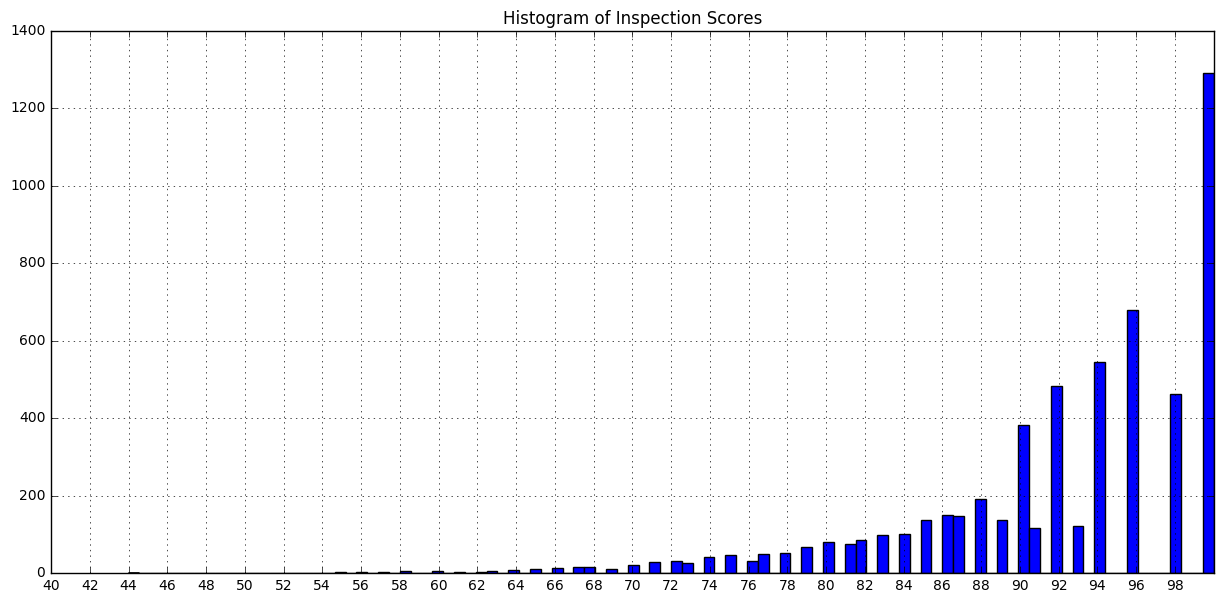

In [23]:
from scipy.stats import expon

# create a matplotlib figure with size [15,7]
figure(figsize=[15,7])

# pandas built-in histogram function automatically distributes and counts bin values 
h = most_recent_inspection_results['Score'].hist(bins=100)

# create x-axis ticks of even numbers 0-100
xticks(np.arange(40, 100, 2))

# add a title to the current figure, our histogram
h.set_title("Histogram of Inspection Scores")

Now that we have a basic idea of the distribution, let us look at some more interesting statistics

In [24]:
scores =  most_recent_inspection_results['Score']
mean = scores.mean()
median = scores.median()

# compute descriptive summary statistics of the inspection scores
summary = scores.describe()

mode = sp.stats.mode(scores)
skew = scores.skew()

# compute quantiles
ninety = scores.quantile(0.9)
eighty = scores.quantile(0.8)
seventy = scores.quantile(0.7)
sixty = scores.quantile(0.6)

print "Skew: " + str(skew)
print "90%: " + str(ninety)
print "80%: " + str(eighty)
print "70%: " + str(seventy)
print "60%: " + str(sixty)
print summary

Skew: -1.38406008151
90%: 100.0
80%: 100.0
70%: 98.0
60%: 96.0
count    5824.000000
mean       91.590659
std         8.296706
min        44.000000
25%        88.000000
50%        94.000000
75%        98.000000
max       100.000000
Name: Score, dtype: float64


## ___Propose Solutions___

Since we have explored our data and have a better idea of its nature, we can begin to devise a plan to answer our questions. This is usually the most iterative part of the entire process: as we learn more about our data we modify our approach, and as modify our solutions we must re-examine our data.

#### Goals:
> How does an individual restaurants' score compare to the whole/aggregate of SF?

> Are SF's inspections better or worse than other cities?

> If a restaurant has not yet been inspected, can we approximate/predict what score it will receive? 

#### Solutions:
> Collect summary statistics (mean, median, standard deviation, etc.) about distribution of scores.

> Acquire data on inspection scores for other cities, compare distribution of cities.

> Perform a linear regression on historic data on past inspections combined with scores from other 'similar' restaurants.

## ___Collect Metrics___

This is the step where derivative values are often calculated, including __summary statistics__, __transformations__ on the data, and __correlations__.  There also is a bit of traditional __data mining__ involved as most machine learning occurs in the solutions and metrics stages (in our formulation).  We could even go so far as to say that the results of predictive models are simply additional metrics: the __probability__ of defaulting on a loan, the __cluster__ a new product belongs in, or the __score__ of a restaurant that hasn't been inspected yet.
    
___The purpose of this part of the process is to calculate the information you need to begin evaluating and testing you solutions and hypotheses.___

Given a mapping from score ranges to descriptions, we want to assign a discription to each business in our grouped DataFrame. We will use create description bins using the description ranges, then use a built-in Pandas function to assign each business to a bin. 

In [27]:
# first we need to discretize the numerical values, this can be 
# thought of as converting a continuous variable into a categorical one.
descriptions = ['Poor', 'Needs Improvement', 'Adequate', 'Good']
bins = [-1, 70, 85, 90, 100]

# copy the scores from our grouped DataFrame, DataFrames manipulate
# in place if we do not explicitly copy them.
scores = most_recent_inspection_results['Score'].copy()
score_transform = most_recent_inspection_results.copy()

# built-in pandas function which assigns each data point in 
# 'scores' to an interval in 'bins' with labels of 'descriptions'
discretized_scores = pd.cut(scores, bins ,labels=descriptions)

Now let's apply these transformations to the old DataFrame.


In [28]:
# tranform the original DataFrame's "Score" column with the new descriptions
score_transform['Score'] = discretized_scores

score_transform[['name', 'date','Score']].head(15)

,,name,date,Score
business_id,,,,
10,0,TIRAMISU KITCHEN,20121114,Good
12,5,KIKKA,20121120,Good
17,9,GEORGE'S COFFEE SHOP,20120823,Good
19,13,NRGIZE LIFESTYLE CAFE,20121127,Good
24,18,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,20121018,Good
29,23,CHICO'S PIZZA,20121228,Adequate
31,28,NORMAN'S ICE CREAM AND FREEZES,20121217,Good
37,33,CAFE BISTRO,20130130,Good
40,38,MO'S COFFEE BAR,20121213,Good


__By quantizing the scores of the restaurant inspections, we can get a better qualitative insight into the ratings.  Let us compare this new distribution of quantized scores to the raw numeric values.__

## ___Evaluate___

With the metrics we need properly calculated, it is time to draw some conclusions from our analyses.  We need to evaluate whether the result we have arrived at:
    
* Answers our original question to an acceptable level of confidence.
* Has allowed us to achieve our goals? 

Let's plot a histogram of the discretized scores to visualize where the restaurant scores fall within our description bins.

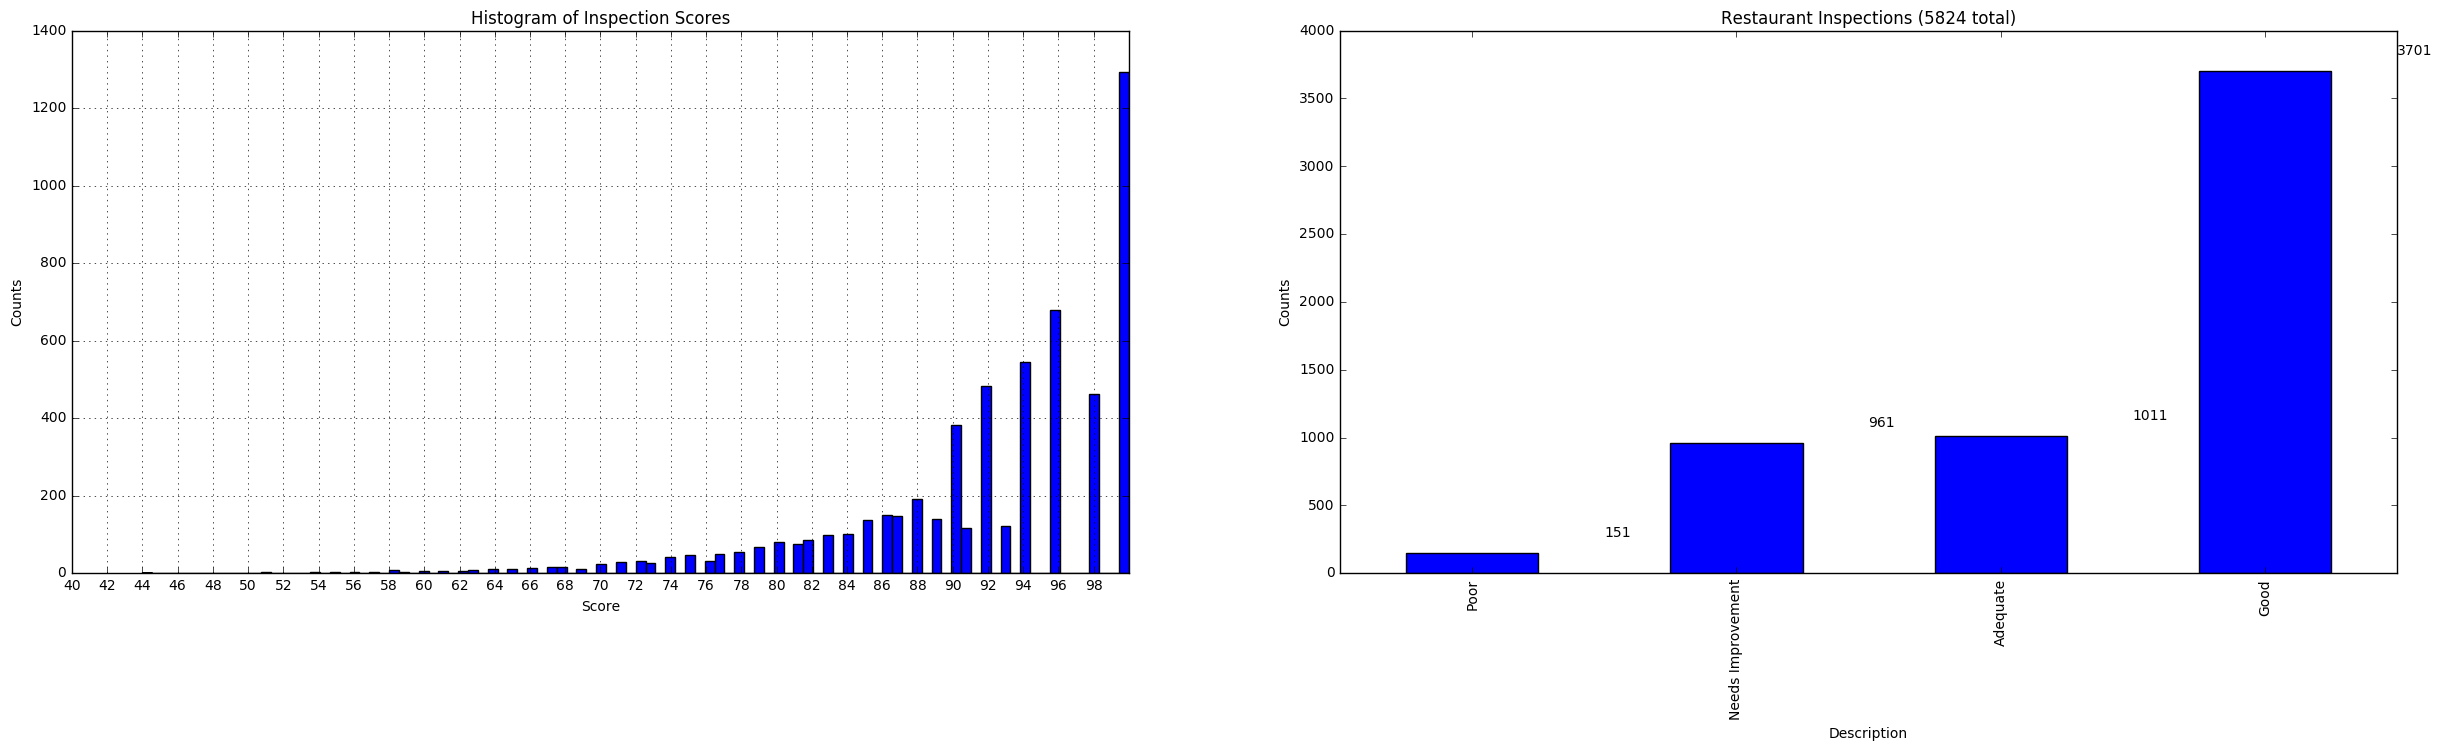

In [29]:
# create a figure with 2 subplots
fig = figure(figsize=[30,7])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# count each occurance of descriptions in the 'Score' column,
# and reverse this result so 'Poor' is left most and 'Good' right most
counts = score_transform['Score'].value_counts()[::-1]
plt = counts.plot(kind='bar', ax=ax2)

# decorate the plot and axis with text
ax2.set_title("Restaurant Inspections (%i total)" % sum(counts))
ax2.set_ylabel("Counts")
ax2.set_xlabel("Description")

# let us add some labels to each bar
for x, y in enumerate(counts):
    plt.text(x + 0.5, y + 200, '%.f' % y, ha='left', va= 'top')
    
# plot the original raw scores (same graph as earlier)
most_recent_inspection_results['Score'].hist(bins=100, ax= ax1)
# create x-axis ticks of even numbers 0-100
ax1.set_xticks(np.arange(40, 100, 2))

# add a title to the current figure, our histogram
ax1.set_title("Histogram of Inspection Scores")
ax1.set_ylabel("Counts")
ax1.set_xlabel("Score")

savefig('histograms.png', bbox_inches=0)

We can see that a majority of restaurants are __adequate__ or __good__, according to the quantiles only __25%__ have scores less than __88__.  While the histogram of the numeric scores gives us a more granular look at the data, it can be quite difficult to derive value from it.  Is an __86__ a filthy/unhealthy restaurant or did it simply forget a few nuanced inspection rules?  The Score Legend provides us a mapping from a raw score to a meaningful value, similar to the scaling of standardized test raw scores. 

If we are not satisfied with our evaluation, we need to iterate on our approach:
    
* Do I need more/better data?
* Do I need to try a different proposed solution?
* Do I need to calculate different metrics?

We'll plot the histogram once again, this time marking the quantiles to provide a more meaningful representation of the scores.

count    5824.000000
mean       91.590659
std         8.296706
min        44.000000
25%        88.000000
50%        94.000000
75%        98.000000
max       100.000000
Name: Score, dtype: float64


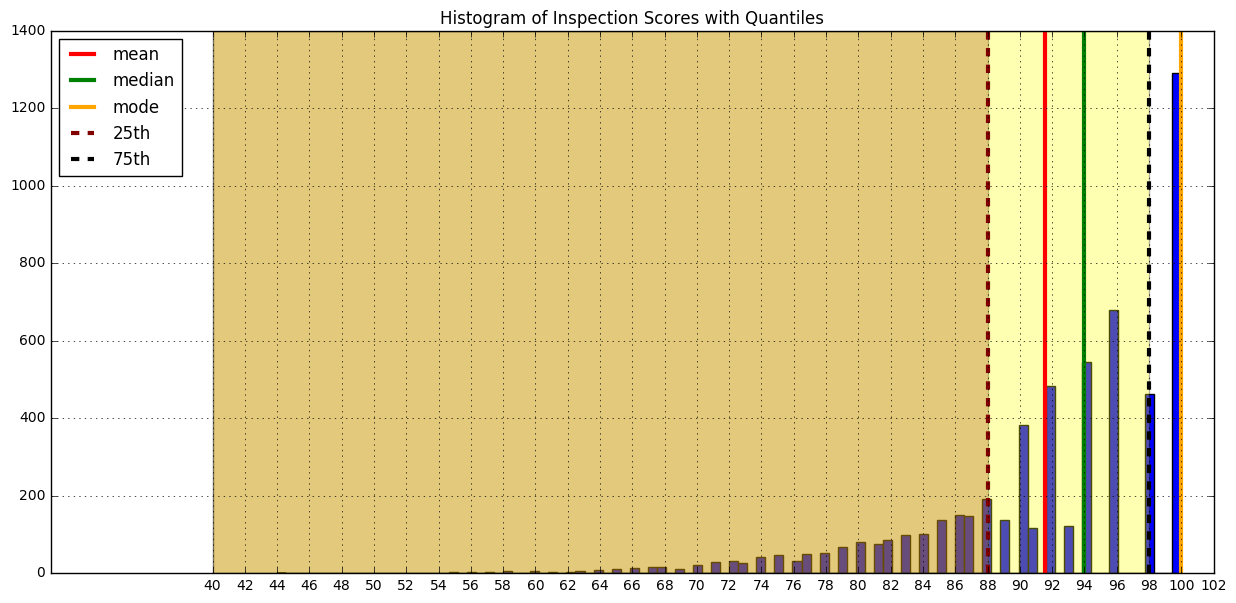

In [30]:
# create a matplotlib figure with size [15,7]
figure(figsize=[15,7])

# pandas built-in histogram function automatically distributes and counts bin values 
h = most_recent_inspection_results['Score'].hist(bins=100)

# summary statistics vertical lines
axvline(x=mean,color='red',ls='solid', lw="3", label="mean")
axvline(x=median,color='green',ls='solid', lw="3", label="median")
axvline(x=mode[0][0],color='orange',ls='solid', lw="3", label="mode")

# 25th quantile
axvline(x=summary['25%'],color='maroon',ls='dashed', lw="3", label="25th")
axvspan(40, summary['25%'], facecolor="maroon", alpha=0.3)

# 75th quantile
axvline(x=summary['75%'],color='black',ls='dashed', lw="3", label="75th")
axvspan(40, summary['75%'], facecolor="yellow", alpha=0.3 )

# create x-axis ticks of even numbers 0-100
xticks(np.arange(40, 104, 2))

# add legend to graph
legend(loc=2)

# add a title to the current figure, our histogram
h.set_title("Histogram of Inspection Scores with Quantiles")

savefig('quantiles.png', bbox_inches=0, transparent=True)

print summary

## ___Iterate___

Now that we have a general idea of the distribution of these scores, let us see if we can find any correlation between score ranges and health violations.

In [32]:
import re as re
import collections as c
import pprint as pp

# first let us form a 'big table' by joining the violations to the most recent inspection scores
file="/Users/jerrytang/dv/happy-healthy-hungry/data/SFFoodProgram_Complete_Data/violations_plus.csv"

df_violations = pd.read_csv(file)

violation_table = most_recent_inspection_results.merge(df_violations, on=['business_id','date'])
violation_table.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,date,type,violation_type_id,ViolationSeverity,description
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,NaN,98,20121114,routine,54,Minor,Unclean or degraded floors walls or ceilings
1,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,42,Minor,Unclean nonfood contact surfaces
2,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,24,Minor,Inadequately cleaned or sanitized food contact...
3,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,3,Minor,High risk food holding temperature
4,29,CHICO'S PIZZA,131 06TH ST,San Francisco,CA,94103,37.774722,-122.406761,1.415525e+10,87,20121228,routine,42,Minor,Unclean nonfood contact surfaces


Let's plot a histogram for the violations data to see how the violations are distributed

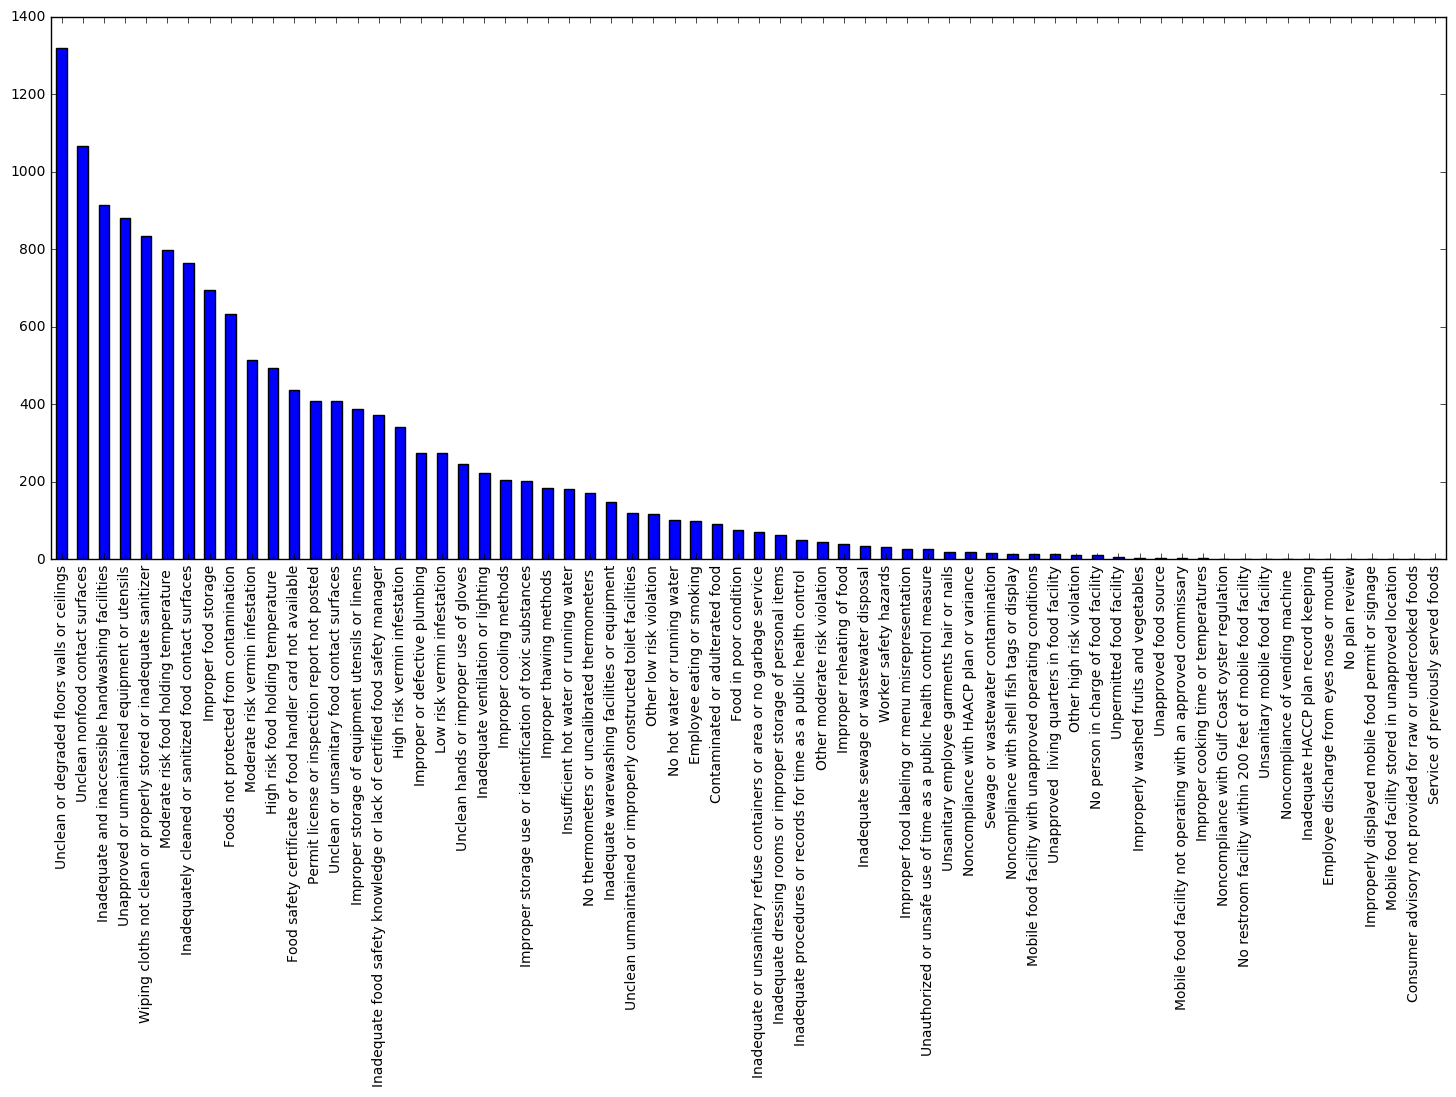

In [34]:
figure(figsize=[18,7])

violation_hist = violation_table['description'].value_counts().plot(kind="bar")

We might also be curious to see what violations a restaurant can have and still get a perfect score, so we'll filter the violation table for perfect scores.

In [38]:
figure(figsize=[18,7])

perfect_scores = violation_table[violation_table['Score'] == 100]
perfect_scores

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,date,type,violation_type_id,ViolationSeverity,description
1,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,42,Minor,Unclean nonfood contact surfaces
2,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,24,Minor,Inadequately cleaned or sanitized food contact...
3,17,GEORGE'S COFFEE SHOP,2200 OAKDALE AVE,San Francisco,CA,94124,37.741086,-122.401737,1.415553e+10,100,20120823,routine,3,Minor,High risk food holding temperature
5580,5312,THE WATERFRONT,PIER 9,San Francisco,CA,94111,NaN,NaN,NaN,100,20120912,routine,54,Minor,Unclean or degraded floors walls or ceilings
7747,28016,GRIDIRON BAR,MONSTER PARK MEZZ LEVEL,San Francisco,CA,NaN,0.000000,0.000000,NaN,100,20130112,routine,33,Minor,Foods not protected from contamination
8857,36744,EL CASTILLITO TAQUERIA STAR,250 GOLDEN GATE AVE,San Francisco,CA,94102,37.781788,-122.414704,NaN,100,20130426,routine,19,Minor,Inadequate and inaccessible handwashing facili...
8858,36744,EL CASTILLITO TAQUERIA STAR,250 GOLDEN GATE AVE,San Francisco,CA,94102,37.781788,-122.414704,NaN,100,20130426,routine,42,Minor,Unclean nonfood contact surfaces
8859,36744,EL CASTILLITO TAQUERIA STAR,250 GOLDEN GATE AVE,San Francisco,CA,94102,37.781788,-122.414704,NaN,100,20130426,routine,45,Minor,Improper storage of equipment utensils or linens
8860,36744,EL CASTILLITO TAQUERIA STAR,250 GOLDEN GATE AVE,San Francisco,CA,94102,37.781788,-122.414704,NaN,100,20130426,routine,56,Minor,Permit license or inspection report not posted
8861,36744,EL CASTILLITO TAQUERIA STAR,250 GOLDEN GATE AVE,San Francisco,CA,94102,37.781788,-122.414704,NaN,100,20130426,routine,5,Minor,Improper cooling methods


Then we'll plot a new violation histogram based on the filtered dataset.

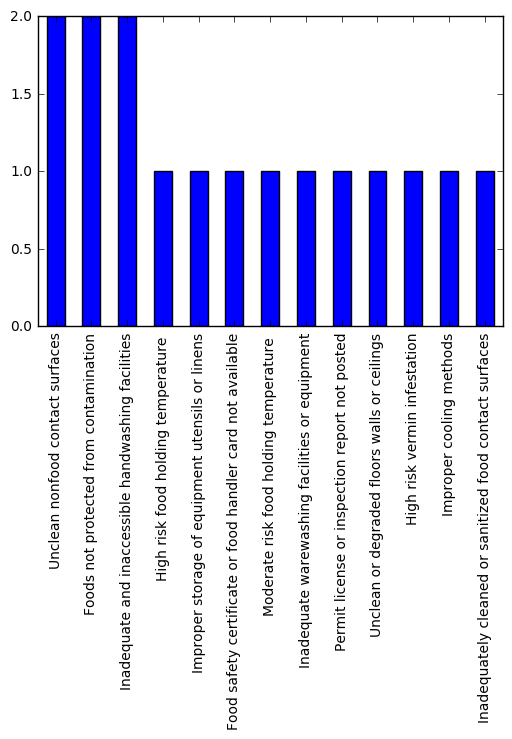

In [39]:
violation_hist = perfect_scores['description'].value_counts().plot(kind="bar")

Finally, let's look at how health violations are distributed across the different score description bins. We'll use the same discretizing process used earlier to create the score descriptions. 

In [40]:
# Let us bin health violations using the cities quantizations
descriptions = ['Poor', 'Needs Improvement', 'Adequate', 'Good']
bins = [-1, 70, 85, 90, 100]

# copy the scores from our grouped DataFrame, DataFrames manipulate
# in place if we do not explicitly copy them.
scores = violation_table['Score'].copy()
violation_transform = violation_table.copy()

# built-in pandas funcion which assigns each data point in 
# 'scores' to an interval in 'bins' with labels of 'descriptions'
discretized_scores = pd.cut(scores, bins ,labels=descriptions)
violation_transform["Scores"] = discretized_scores

In [41]:
grouped = violation_transform.groupby('Scores')

We can now find the most common violations for each group by applying a function that counts and normalizes the offense types across the description groups. 

In [44]:
# a funtion that takes a DataFrame and returns the top violations
def common_offenses(df):
    return pd.DataFrame(df['description'].value_counts(normalize=True) * 100).head(10)

top_offenses = grouped.apply(common_offenses)
top_offenses

description
Scores                                                                           
Poor              Unclean or degraded floors walls or ceilings           6.959153
                  Unclean or unsanitary food contact surfaces            6.656581
                  Unclean nonfood contact surfaces                       6.278366
                  High risk vermin infestation                           6.051437
                  Unapproved or unmaintained equipment or utensils       5.824508
                  Foods not protected from contamination                 5.748865
                  Inadequate and inaccessible handwashing facilities     5.673222
                  High risk food holding temperature                     5.295008
                  Inadequate food safety knowledge or lack of cer...     5.068079
                  Improper food storage                                  4.084720
Needs Improvement Unclean or degraded floors walls or ceilings           8.003078
                  Unclean nonfood contact surfaces                       6.887264
                  Inadequate and inaccessible handwashing facilities     5.867641
                  Unapproved or unmaintained equipment or utensils       5.848403
                  Foods not protected from contamination                 5.367449
                  Inadequately cleaned or sanitized food contact ...     5.348211
                  High risk food holding temperature                     4.924971
                  Wiping cloths not clean or properly stored or i...     4.732589
                  Moderate risk food holding temperature                 4.636399
                  Improper food storage                                  4.386302
Adequate          Unclean or degraded floors walls or ceilings           8.735189
                  Unclean nonfood contact surfaces                       7.495178
                  Inadequate and inaccessible handwashing facilities     7.192064
                  Moderate risk food holding temperature                 6.999173
                  Inadequately cleaned or sanitized food contact ...     6.255167
                  Unapproved or unmaintained equipment or utensils       6.227611
                  Wiping cloths not clean or properly stored or i...     6.062276
                  Improper food storage                                  4.877377
                  Moderate risk vermin infestation                       4.408928
                  Foods not protected from contamination                 4.243593
Good              Unclean or degraded floors walls or ceilings          11.272727
                  Unclean nonfood contact surfaces                       8.068182
                  Wiping cloths not clean or properly stored or i...     7.227273
                  Inadequate and inaccessible handwashing facilities     6.227273
                  Unapproved or unmaintained equipment or utensils       6.204545
                  Moderate risk food holding temperature                 5.954545
                  Food safety certificate or food handler card no...     5.386364
                  Improper food storage                                  5.363636
                  Inadequately cleaned or sanitized food contact ...     4.931818
                  Permit license or inspection report not posted         3.568182